In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as at
import astropy.units as u
import jax.numpy as jnp

import loss      as wobble_loss
import simulator as wobble_sim
import model     as wobble_model
import dataset   as wobble_data
import plottings as wobble_plot

In [2]:
n =512
r =400
l=0
maxiter = 8
maxiter2 =4
xlim = (0,256)
boundaries = (9.736,9.7365)
fig1_name = "out/hatp20{}_{}_n{}_l{}_r{}_mI{}.png".format(xlim[0],xlim[1],n,l,r,maxiter)
fig2_name = "out/hatp20{}_{}_n{}_l{}_r{}_mI{}_rd2mI{}.png".format(xlim[0],xlim[1],n,l,r,maxiter,maxiter2)


In [3]:
sigma=80
tbl     = at.QTable.read('data/hat-p-20.fits')
dataset = wobble_data.AstroDataset(tbl['flux'],tbl['wavelength'],tbl['mask'],tbl['flux_err'])
print(tbl['wavelength'].shape)
dataset.interpolate_mask()
filter      = dataset.gauss_filter(sigma=sigma)

(60, 6144)


(60, 6144)
0 400


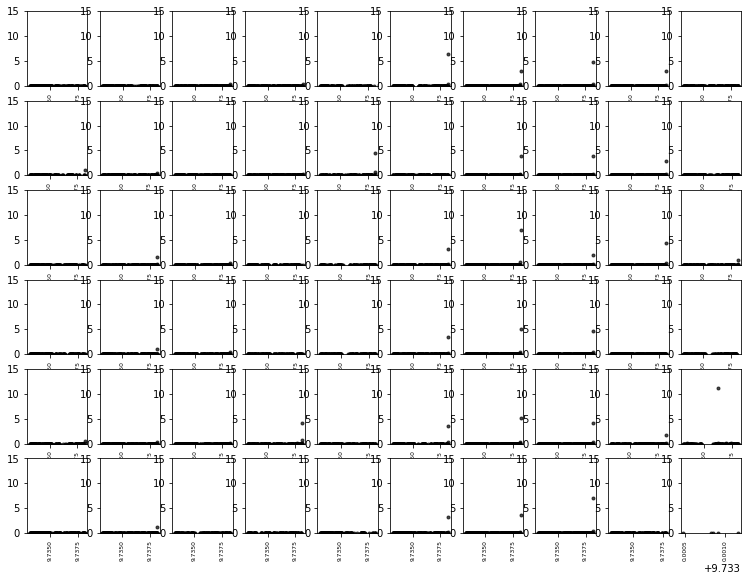

In [4]:
dataset.mask_flux_error()
x, y, y_err = dataset.get_xy(filter,subset=(l,r))
wobble_plot.plot_error(x,y_err**2)

plt.show()

In [5]:
# print(x.shape,y_err.shape)
# wobble_plot.plot_error(x,y_err**2)
# plt.show()

In [6]:
print(x.shape)



(60, 400)


In [7]:
x_shifts = wobble_data.getInitXShift(tbl['BJD'],'HAT-P-20','APO')

loss = 1000*wobble_loss.ChiSquare()

In [8]:
model  = wobble_model.JnpLinErr(n,y,x,y_err,x_shifts)
model.optimize(loss,maxiter=maxiter)

      fun: array(2.20755242e+16)
 hess_inv: <512x512 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.03237097e+11,  7.49890175e+11, -3.05085678e+11, -4.50451472e+11,
       -1.71031134e+11,  7.13308504e+11,  2.46198698e+11,  2.22432592e+11,
        1.34973751e+11,  2.96610693e+10, -2.19705508e+11, -5.60606478e+11,
        1.84409915e+11, -4.18686042e+11, -1.09405536e+11, -1.67226442e+11,
       -2.51409203e+10,  5.87075420e+11,  1.08671559e+12,  2.05735880e+12,
        3.16783880e+12,  3.63250083e+12,  4.62053651e+12,  3.11297599e+12,
        2.63671382e+12,  5.03448338e+11,  4.39531831e+11, -1.14046350e+12,
        4.08302387e+09, -2.63685407e+11, -9.99458079e+11,  1.73738033e+11,
       -9.70345611e+11, -3.97936230e+10, -2.08632021e+11, -4.39223517e+11,
        1.44699818e+11, -3.29731015e+11,  2.51759034e+11, -1.02987465e+11,
        2.96423260e+10,  2.66769400e+11, -5.53541304e+11,  7.05849459e+11,
       -9.33445501e+11,  5.58248100e+11, -6.66393117e+11,  1.19306453e+

(6, 10)


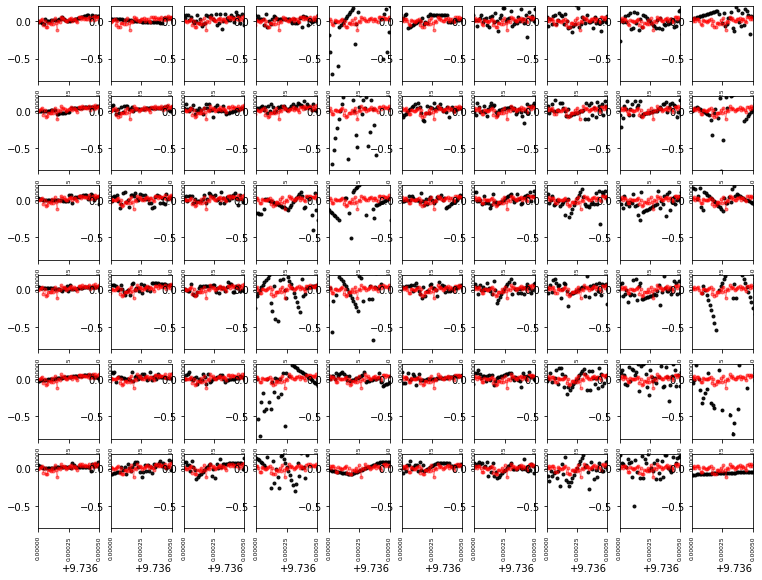

In [9]:
wobble_plot.plot_linear(model,model.params,model.shifted,noise=model.y_err,xlim=boundaries)
plt.savefig(fig1_name)
plt.show()

In [10]:
check = loss(model.params,y[0,l:r],x[0,l:r],0,model)

In [11]:
print(check)

35991150000000.0
